# Build a regression model

## Preparing data

### First, check for missing dates

In [109]:
import pandas as pd
pumpkins = pd.read_csv('./US-pumpkins.csv')

# filter data by selecting only pumpkins with the string 'bushel' in their Package column
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

# Use the head() function to view the first five rows.
pumpkins.head()

# Check if there is missing data in the current dataframe:
pumpkins.isnull().sum()

# select only the columns you need, using the loc function
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date', 'Variety', 'City Name']
pumpkins = pumpkins.loc[:, columns_to_select]
print(pumpkins)

                   Package  Low Price  High Price     Date    Variety  \
70    1 1/9 bushel cartons      15.00        15.0  9/24/16   PIE TYPE   
71    1 1/9 bushel cartons      18.00        18.0  9/24/16   PIE TYPE   
72    1 1/9 bushel cartons      18.00        18.0  10/1/16   PIE TYPE   
73    1 1/9 bushel cartons      17.00        17.0  10/1/16   PIE TYPE   
74    1 1/9 bushel cartons      15.00        15.0  10/8/16   PIE TYPE   
...                    ...        ...         ...      ...        ...   
1738    1/2 bushel cartons      15.00        15.0  9/30/16  MINIATURE   
1739    1/2 bushel cartons      13.75        15.0  9/30/16  MINIATURE   
1740    1/2 bushel cartons      10.75        15.0  9/30/16  MINIATURE   
1741    1/2 bushel cartons      12.00        12.0  9/30/16  MINIATURE   
1742    1/2 bushel cartons      12.00        12.0  9/30/16  MINIATURE   

      City Name  
70    BALTIMORE  
71    BALTIMORE  
72    BALTIMORE  
73    BALTIMORE  
74    BALTIMORE  
...         ...

### Second, determine average price of pumpkin

In [110]:
# To calculate the average
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
# print(price)
# print(month)
new_pumpkins = pd.DataFrame({
    'Month': month,
    'Package': pumpkins['Package'],
    'Low Price': pumpkins['Low Price'],
    'High Price': pumpkins['High Price'],
    'Price': price,
    'Variety': pumpkins['Variety'],
    'City Name': pumpkins['City Name']
})
# print(new_pumpkins)

# to normalize the pricing so that you show the pricing per bushel
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
print(new_pumpkins)


      Month               Package  Low Price  High Price  Price    Variety  \
70        9  1 1/9 bushel cartons      15.00        15.0  13.50   PIE TYPE   
71        9  1 1/9 bushel cartons      18.00        18.0  16.20   PIE TYPE   
72       10  1 1/9 bushel cartons      18.00        18.0  16.20   PIE TYPE   
73       10  1 1/9 bushel cartons      17.00        17.0  15.30   PIE TYPE   
74       10  1 1/9 bushel cartons      15.00        15.0  13.50   PIE TYPE   
...     ...                   ...        ...         ...    ...        ...   
1738      9    1/2 bushel cartons      15.00        15.0  30.00  MINIATURE   
1739      9    1/2 bushel cartons      13.75        15.0  28.75  MINIATURE   
1740      9    1/2 bushel cartons      10.75        15.0  25.75  MINIATURE   
1741      9    1/2 bushel cartons      12.00        12.0  24.00  MINIATURE   
1742      9    1/2 bushel cartons      12.00        12.0  24.00  MINIATURE   

      City Name  
70    BALTIMORE  
71    BALTIMORE  
72    BAL

# Correlation

## Looking for Correlation

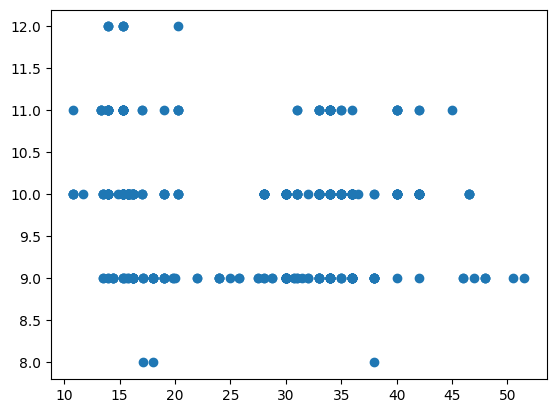

In [111]:
# create some basic plots to display the new dataframe you just created
import matplotlib.pyplot as plt

price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

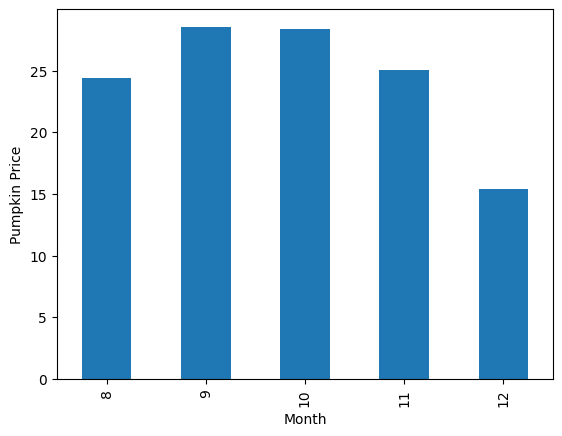

In [112]:
# To get charts to display useful data, you usually need to group the data somehow.

new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

### using the corr function to see correlations

-0.1491291363427862
-0.16690092505934478


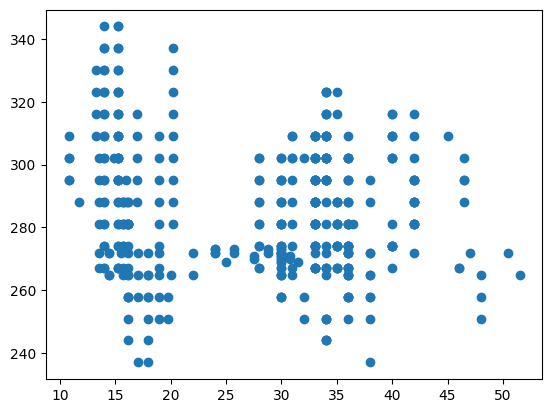

In [113]:
from datetime import datetime

print(new_pumpkins['Month'].corr(new_pumpkins['Price']))

# add a new column "day of year" to the dataframe
# day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
day_of_year = pd.to_datetime(pumpkins['Date'], format='mixed').apply(lambda dt: (dt - datetime(dt.year, 1, 1)).days)
new_pumpkins['DayOfYear'] = day_of_year
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))
plt.scatter(new_pumpkins.Price, new_pumpkins.DayOfYear)
plt.show()

### To find clusters' relationship

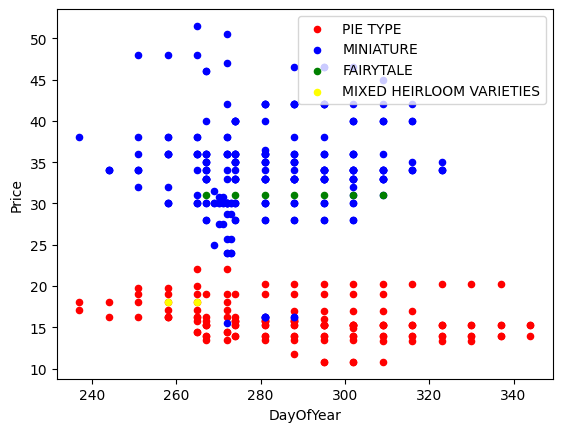

In [114]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)


### To see the effect according to Our investigation

<Axes: xlabel='Variety'>

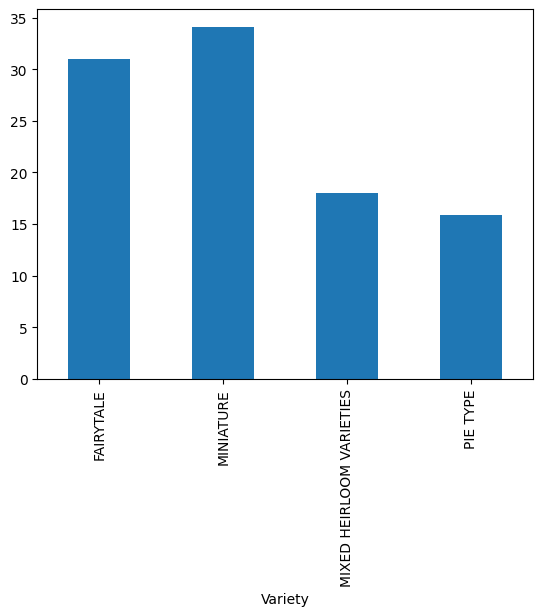

In [115]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.26678559691441883


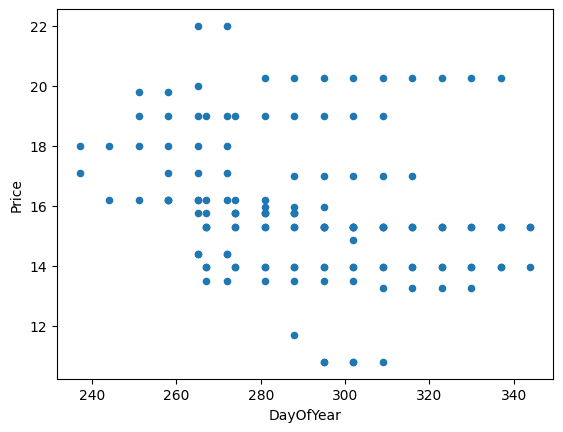

In [116]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price')
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

### Clean Data

In [117]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   Package     144 non-null    object 
 2   Low Price   144 non-null    float64
 3   High Price  144 non-null    float64
 4   Price       144 non-null    float64
 5   Variety     144 non-null    object 
 6   City Name   144 non-null    object 
 7   DayOfYear   144 non-null    int64  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


C:\Users\lvgy\AppData\Local\Temp\ipykernel_35344\664819136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


## Simple Linear Regression

In [118]:
# use the Scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


### separating input values (features) and the expected output (label)

In [119]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
print(X)
y = pie_pumpkins['Price']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


[[267]
 [267]
 [274]
 [274]
 [281]
 [281]
 [281]
 [281]
 [288]
 [288]
 [288]
 [295]
 [295]
 [295]
 [302]
 [302]
 [302]
 [258]
 [265]
 [265]
 [265]
 [272]
 [272]
 [309]
 [316]
 [323]
 [330]
 [267]
 [274]
 [281]
 [288]
 [295]
 [302]
 [309]
 [316]
 [323]
 [330]
 [337]
 [267]
 [274]
 [281]
 [288]
 [295]
 [302]
 [309]
 [316]
 [323]
 [330]
 [337]
 [344]
 [265]
 [272]
 [267]
 [267]
 [267]
 [274]
 [274]
 [274]
 [281]
 [281]
 [281]
 [288]
 [288]
 [288]
 [295]
 [295]
 [295]
 [302]
 [302]
 [302]
 [309]
 [309]
 [309]
 [316]
 [316]
 [316]
 [323]
 [323]
 [323]
 [330]
 [330]
 [337]
 [337]
 [344]
 [344]
 [237]
 [244]
 [244]
 [251]
 [251]
 [258]
 [258]
 [265]
 [265]
 [272]
 [272]
 [281]
 [288]
 [295]
 [302]
 [309]
 [316]
 [323]
 [330]
 [337]
 [272]
 [267]
 [274]
 [281]
 [288]
 [295]
 [302]
 [309]
 [265]
 [267]
 [274]
 [281]
 [288]
 [295]
 [302]
 [309]
 [251]
 [258]
 [265]
 [272]
 [295]
 [302]
 [309]
 [251]
 [258]
 [258]
 [265]
 [272]
 [288]
 [295]
 [302]
 [309]
 [316]
 [288]
 [295]
 [302]
 [237]
 [258]

###  training the actual Linear Regression model

In [120]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

### predict and measure the errors

In [121]:
import numpy as np

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.76 (17.3%)


### indicator of model quality with the coefficient of determination

In [122]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.04499342423558461


###  plot the test data together with the regression line

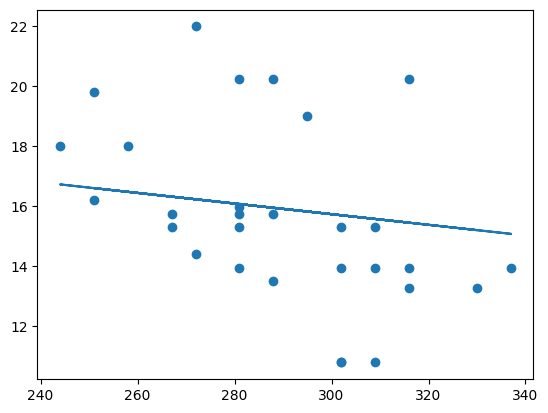

In [123]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

## Polynomial Regression

### create a pipeline, adds polynomial features, then trains the regression

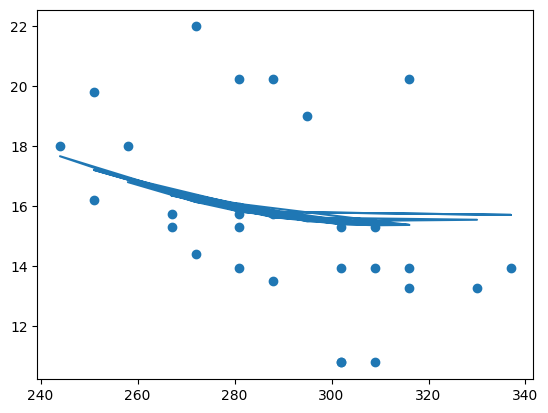

In [124]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# A pipeline is a chain of estimators.
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)
pipeline_pred = pipeline.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,pipeline_pred)

## Categorical Features

### convert non-numeric values to numeric form, or encode it
#### Simple numeric encoding
will build a table of different varieties, and then replace the variety name by an index in that table.
#### One-hot encoding
 will replace the Variety column by 4 different columns, one for each variety. Each column will contain 1 if the corresponding row is of a given variety, and 0 otherwise

### To train linear regression using one-hot encoded

In [125]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']
print(X)

# The rest of the code is the same as what we used above to train Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

# plt.scatter(X_test,y_test)
# plt.plot(X_test,pred)


      FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70        False      False                     False      True
71        False      False                     False      True
72        False      False                     False      True
73        False      False                     False      True
74        False      False                     False      True
...         ...        ...                       ...       ...
1738      False       True                     False     False
1739      False       True                     False     False
1740      False       True                     False     False
1741      False       True                     False     False
1742      False       True                     False     False

[415 rows x 4 columns]
Mean error: 5.26 (19.8%)
Model determination:  0.7757064548947359


###  take more categorical features into account To get even more accurate predictions

In [127]:
X = pd.get_dummies(new_pumpkins['Variety']) \
    .join(new_pumpkins['Month']) \
    .join(pd.get_dummies(new_pumpkins['City Name'])) \
    .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# The rest of the code is the same as what we used above to train Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.84 (10.6%)
Model determination:  0.9410368992108207


### take more categorical features to train polynomial regression model

In [130]:
# set up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
    .join(new_pumpkins['Month']) \
    .join(pd.get_dummies(new_pumpkins['City Name'])) \
    .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.28%)
Model determination:  0.9658747228525119
